In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from skimage.transform import resize

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

#### Load results from covariance analysis for RFs from white noise stimuli

In [4]:
with open(data_dir + '/models/results/covariance_analysis/v1_wn_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

#### Plot covariance matrices between data and model

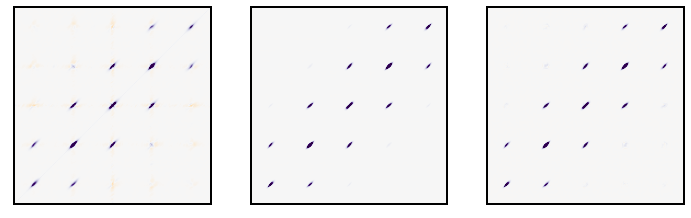

In [5]:
# plot the covariance matrices
keys = ['data', 'model', 'finite']
fig = plt.figure(figsize=(12, 4))
for i, key in enumerate(keys): 
    ax = fig.add_subplot(1, 3, i + 1)
    plot = plt.imshow(cov_mat[key], cmap='PuOr') # PiYG_r
    plt.clim(-5, 5)
    plt.xlim(180, 360)
    plt.ylim(180, 360)
    plt.xticks([])
    plt.yticks([])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_wn.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0.015)

# save the colorbar separately
fig, ax = plt.subplots(figsize=(8, 4))
cbar = plt.colorbar(plot, ax=ax)
cbar.set_ticks([])
ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

#### Plot the eigenvalue spectrum

Data: 10 evecs explain 0.63 variance
Model: 10 evecs explain 0.69 variance
Sampled neurons: 10 evecs explain 0.69 variance


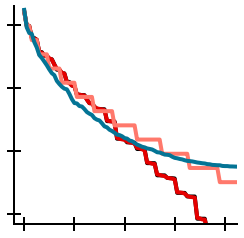

In [6]:
t = 100
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.semilogy(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.semilogy(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.semilogy(np.flip(evals['analytical'])[:t], '-', lw=4, c='#ff796c', alpha=1)
plt.semilogy(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
plt.xlim(-4, 85)
plt.ylim(7 * 1E-5, 2E-1)
plt.yticks([1E-4, 1E-3, 1E-2, 1E-1])
plt.xticks(np.arange(0, 85, 20))
ax.set_xticklabels([])
ax.set_yticklabels([])

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/evals_v1_wn.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

t = 10
print('Data: %d evecs explain %0.2f variance' % (t, np.sum(evals['data'][-t:])))
print('Model: %d evecs explain %0.2f variance' % (t, np.sum(evals['model'][-t:])))
print('Sampled neurons: %d evecs explain %0.2f variance' % (t, np.sum(evals['finite'][-t:])))

#### Plot and save individual eigenvectors

In [7]:
dim = [14, 36]
cx, cy = int(dim[0] / 2), int(dim[1]/ 2) # center
n = 5 # num of pixels from center
left, right = cx - n, cx + n
top, bottom = cy - n, cy + n
keys = ['data', 'model', 'finite', 'analytical']

# sign flips
signs = {'data':np.ones(15), 
        'model':[-1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'finite': [-1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'analytical':[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

fig = plt.figure(figsize=(4, 4))
for i, key in enumerate(keys):
    sign = signs[key]
    for i in range(15):
        if key != 'analytical':
            ev = evecs[key][:, -i - 1]
            img = ev.reshape(dim[0], dim[1])[left:right, top:bottom]
        elif key == 'analytical':
            ev = evecs[key][i]
            img = ev.reshape(dim[0] * 10, dim[1] * 10)[left * 10: right*10, top * 10:bottom*10]
        ax = fig.add_subplot(111)
        plt.imshow(img * sign[i], cmap='PuOr')
        plt.clim(-0.2, 0.2)
        plt.axis('off')
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.set_xticks([])
        ax.set_yticks([])
#         plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/evecs/evecs_%s_%d.png' %(key, i), 
#                     dpi=200, transparent=True,
#                    bbox_inches = 'tight', pad_inches=0)
        plt.close()

#### Plot all the eigenvectors

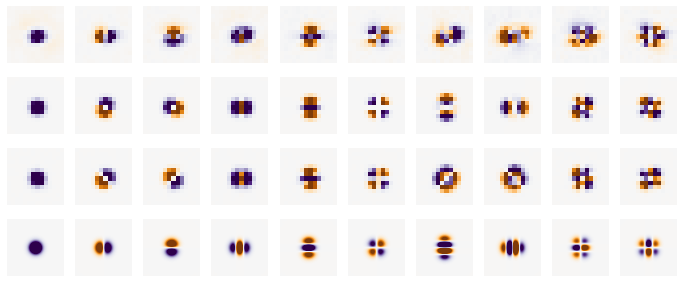

In [8]:
dim = (14, 36)

# sign flips
t =[-1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # model & finite sign
u = [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # analytical sign


# order
m = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7, 8, 9, 10, 11, 12] # model order
a = [0, 2, 1, 4, 5, 3, 9, 8, 6, 7, 8, 9, 10, 11, 12] # analytical order

factor = 1 # resize factor
fig = plt.figure(figsize=(12, 5))
for i in range(10):
    ax = fig.add_subplot(4, 10, i + 1)
    img = evecs['data'][:, - i-1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 10 + i + 1)
    img = evecs['model'][:, -m[i]-1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img * t[i], cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 20 + i + 1)
    img = evecs['finite'][:,  - m[i] - 1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img * t[i], cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 30 + i + 1)
    img = evecs['analytical'][a[i]].reshape(dim[0] * 10, dim[1] * 10)[:, 110:250]
    plt.imshow(img * u[i], cmap='PuOr')
    plt.clim(-0.3, 0.3)
    plt.axis('off')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.5, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/evecs_v1_wn.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches=0)

## Supplementary figure: Plot the full covariance matrix

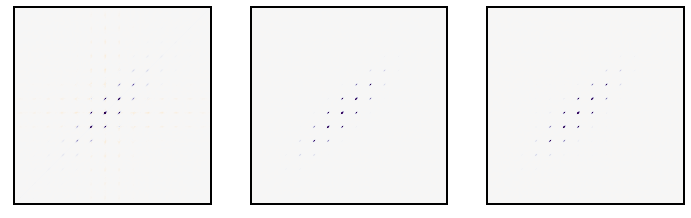

In [9]:
keys = ['data', 'model', 'finite']
fig = plt.figure(figsize=(12, 4))
for i, key in enumerate(keys): 
    ax = fig.add_subplot(1, 3, i + 1)
    plot = plt.imshow(np.flip(cov_mat[key], axis=1), cmap='PuOr') # PiYG_r
    plt.clim(-5, 5)
    plt.xticks([])
    plt.yticks([])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/covmat_v1_wn.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0.015)